In [12]:
import geopandas
df = geopandas.read_file("MI2011/MI.shp")


C:\Users\Luke Wang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


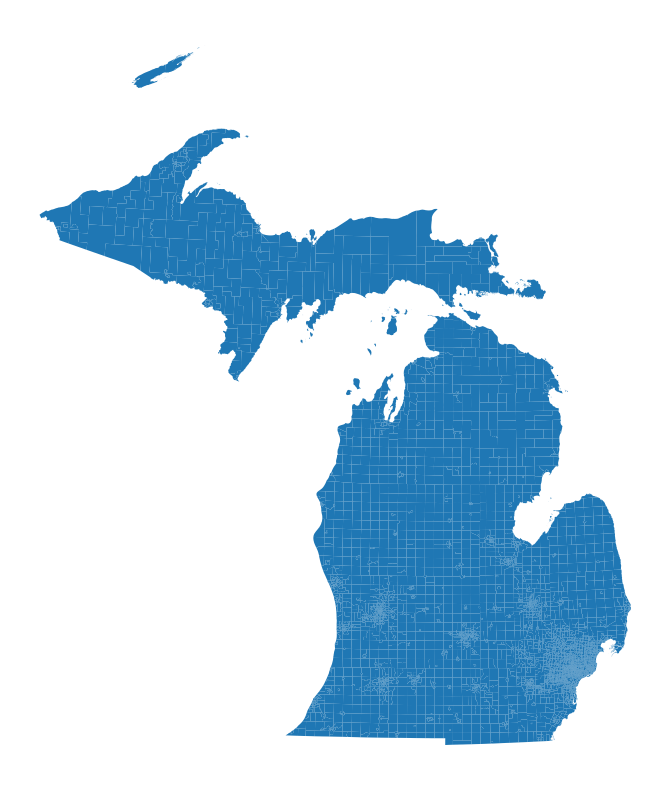

In [13]:
import matplotlib.pyplot as plt

df.to_crs({"init": "epsg:6493"}, inplace=True)

df.plot(figsize=(10, 10))
plt.axis('off')
plt.show()

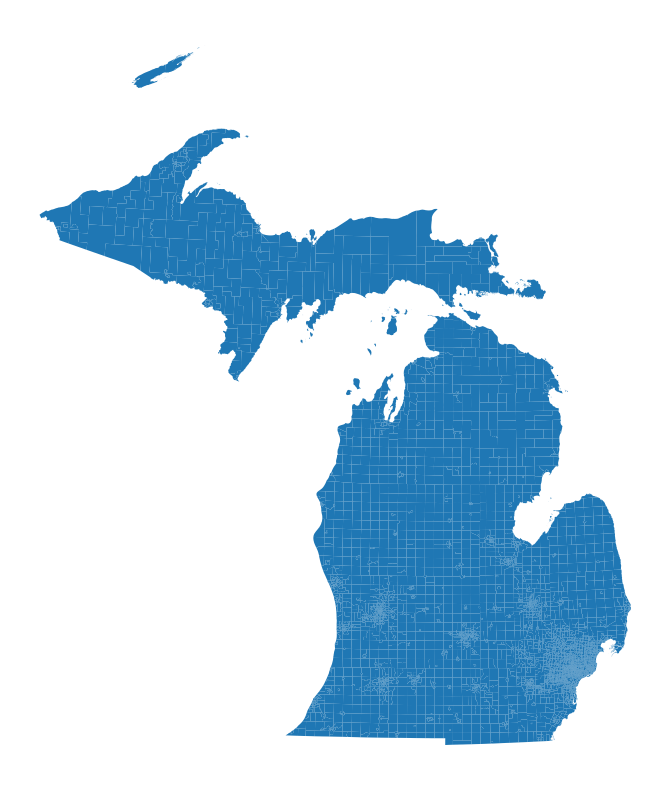

In [15]:
from gerrychain import Graph
from networkx import is_connected, connected_components
graph = Graph.from_json("MI2011/MI_VTDs_self.json")
components = list(connected_components(graph))

biggest_component_size = max(len(c) for c in components)
problem_components = [c for c in components if len(c) != biggest_component_size]
problem_nodes = [node for component in problem_components for node in component]
problem_geoids = [graph.nodes[node]["VTD"] for node in problem_nodes]

is_a_problem = df["VTD"].isin(problem_geoids)
df.plot(column=is_a_problem, figsize=(10, 10))
plt.axis('off')
plt.show()

In [16]:
islands = graph.islands
print(islands)

set()


In [17]:
from networkx import is_connected, connected_components
components = list(connected_components(graph))
print([len(c) for c in components])

[4809]
